# Data Pre-Processing

In [1]:
import pandas as pd
import os

In [2]:
data_dir = "./data/All PPE Folders"
sub_dir = "PPE09182201"
motion_file = "SQT01.mot"

file_name = os.path.join(data_dir, sub_dir, motion_file)
file_name

'./data/All PPE Folders\\PPE09182201\\SQT01.mot'

In [3]:
with open(file_name) as f:
    d = f.read().splitlines()

nrows, ncols = int(d[2].split("=")[1]), int(d[3].split("=")[1])
nrows, ncols

(455, 36)

In [4]:
headers = d[10].split("\t")
len(headers)

36

In [5]:
df = []
for l in d[11:]:
    df.append([float(x) for x in l.split('\t')])

In [6]:
df = pd.DataFrame(df, columns=headers)
df.head()

,time,pelvis_tilt,pelvis_list,pelvis_rotation,pelvis_tx,pelvis_ty,pelvis_tz,hip_flexion_r,hip_adduction_r,hip_rotation_r,...,arm_flex_r,arm_add_r,arm_rot_r,elbow_flex_r,pro_sup_r,arm_flex_l,arm_add_l,arm_rot_l,elbow_flex_l,pro_sup_l
0,0.000000,-8.915465,-2.070948,-2.125879,0.171874,1.014836,-0.035707,7.186281,-5.650549,-3.984943,...,110.892277,-70.499621,35.752012,131.194794,95.448705,99.142583,-40.231697,26.038595,129.812775,102.735301
1,0.016667,-9.015085,-1.376873,-3.803004,0.174239,1.014212,-0.033933,8.125908,-6.286282,-2.746985,...,104.226168,-64.550768,21.603874,144.041484,110.786343,97.742382,-45.318663,24.639729,134.145180,79.369199
2,0.033333,-9.125860,-1.900665,-3.941072,0.169508,1.015510,-0.031200,8.804722,-5.629132,-1.849854,...,101.393066,-60.578942,19.173943,146.548606,109.005938,97.767065,-48.472512,23.204764,137.751748,78.476700
3,0.050000,-8.699670,-1.825717,-3.812869,0.164162,1.011590,-0.032987,8.897467,-5.993804,-1.741397,...,103.831576,-58.845309,20.955075,147.045768,105.421374,100.414508,-49.498046,21.302780,138.554103,75.821215
4,0.066667,-8.494094,-1.812963,-3.728858,0.157963,1.012352,-0.031997,9.409377,-6.160399,-1.946360,...,105.119017,-56.699907,22.410718,147.403452,100.090269,102.540157,-50.488925,19.660346,139.615511,74.899566


In [7]:
parent_dir = "./data"
train_data_dir = "./data/All PPE Folders"
files = [f[0] for f in os.walk(train_data_dir)]
files.pop(0)
files

['./data/All PPE Folders\\PPE09182201',
 './data/All PPE Folders\\PPE09182202',
 './data/All PPE Folders\\PPE09182203',
 './data/All PPE Folders\\PPE09182204',
 './data/All PPE Folders\\PPE09182205',
 './data/All PPE Folders\\PPE09182206',
 './data/All PPE Folders\\PPE09182207',
 './data/All PPE Folders\\PPE09182208',
 './data/All PPE Folders\\PPE09182209',
 './data/All PPE Folders\\PPE09182210',
 './data/All PPE Folders\\PPE09182211',
 './data/All PPE Folders\\PPE09182212',
 './data/All PPE Folders\\PPE09182213',
 './data/All PPE Folders\\PPE09182214',
 './data/All PPE Folders\\PPE09182215',
 './data/All PPE Folders\\PPE09182216',
 './data/All PPE Folders\\PPE09182217',
 './data/All PPE Folders\\PPE09182218',
 './data/All PPE Folders\\PPE09182219',
 './data/All PPE Folders\\PPE09182220',
 './data/All PPE Folders\\PPE09182221',
 './data/All PPE Folders\\PPE10082201',
 './data/All PPE Folders\\PPE10082202',
 './data/All PPE Folders\\PPE10082203',
 './data/All PPE Folders\\PPE10082205',


In [8]:
import pandas as pd

score_sheet = os.path.join(parent_dir, 'scores.xlsx')
xl_file = pd.read_excel(score_sheet, sheet_name=None)
df_labels = xl_file['Sheet1']
df_labels

,Sequence,Score
0,PPE09182201,4
1,PPE09182202,4
2,PPE09182203,2
3,PPE09182204,4
4,PPE09182205,2
5,PPE09182206,4
6,PPE09182207,3
7,PPE09182208,3
8,PPE09182209,2
9,PPE09182210,3


In [9]:
files[0]

'./data/All PPE Folders\\PPE09182201'

# Dataloader

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import Dataset, DataLoader
import math

import torch
import torch.nn as nn


In [84]:
from tqdm import tqdm, trange

window = 50
skip = 1
features = 36

sequences = []
labels = []

for i in trange(len(files)):
    
    motion_name = "SQT01.mot"
    motion_data = os.path.join(files[i], motion_name)
    score = df_labels.loc[df_labels['Sequence '] == files[i][23:], 'Score']


    with open(motion_data) as f:
        d = f.read().splitlines()

    nrows, ncols = int(d[2].split("=")[1]), int(d[3].split("=")[1])
    headers = d[10].split("\t")

    df = []
    for l in d[11:]:
        df.append([float(x) for x in l.split('\t')])

    df = pd.DataFrame(df, columns=headers)
    arr = df.to_numpy()
    
    start = 0
    
    while start < len(df):
        rows = [row.to_numpy() for _, row in df[start:start+window].iterrows()]
        stacked_rows = np.vstack(rows)

        if stacked_rows.shape[0] == window and stacked_rows.shape[1] == features:
            sequences.append(stacked_rows)
            labels.append([int(score)])
        start += skip
    



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:42<00:00,  1.12s/it]


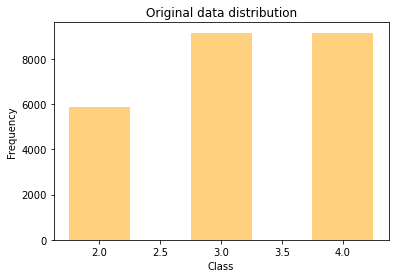

In [85]:
from collections import Counter 

original_dist = [l[0] for l in labels]
counter = Counter(original_dist)
x_data = list(counter.keys())
y_data = list(counter.values())
plt.bar(x_data, y_data, width = 0.5, color = 'orange', alpha = 0.5)

# Add labels
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Original data distribution')

# Show plot
plt.show()


In [86]:
len(sequences), len(labels)

(24157, 24157)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(sequences, labels, random_state=42, test_size=0.2, shuffle=True)


In [88]:
len(X_train), len(X_test), len(y_train), len(y_test)

(19325, 4832, 19325, 4832)

In [89]:
# hyper parameters

num_epochs = 30
batch_size = 32
learning_rate = 0.001
num_classes = 5

In [90]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [91]:
# device config
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [92]:
class SliceDataset(Dataset):
    
    def __init__(self, train = True):
        self.train = train
        if self.train:
            self.X = np.array(X_train)
            self.y = np.array(y_train)
    
        else:
            self.X = np.array(X_test)
            self.y = np.array(y_test)

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return torch.from_numpy(self.X[index].astype(np.float32)), torch.from_numpy(self.y[index].astype(np.int64))
   

In [93]:
dataset = SliceDataset(train = True)
dataloader = DataLoader(dataset = dataset, batch_size = batch_size, shuffle = True, num_workers = 0)

# Next 4 lines are just to see the data for batch_size = 4 and NOT a part of pipeline

print(len(dataloader))
dataiter = iter(dataloader)
data = dataiter.next()
seq, lbl = data
print(seq.shape, lbl.shape)

604
torch.Size([32, 50, 36]) torch.Size([32, 1])


# MLP Model

In [94]:
class SquatClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SquatClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [95]:
input_size = window*features
hidden_size = 100

In [96]:
model = SquatClassifier(input_size, hidden_size, num_classes)
model = model.to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [97]:
n_total_steps = len(dataloader)

losses = []
batch_losses = []
for epoch in trange(num_epochs):
    
    running_loss = 0.0
    for i, (seqs, labels) in enumerate(dataloader):
        
        seqs = seqs.reshape(-1, window*features).to(DEVICE)
        labels = labels.to(DEVICE)

        # Forward
        outputs = model(seqs)
#         print(outputs.shape)
#         print(outputs)
        loss = criterion(outputs, labels.squeeze(1))
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#         print(loss.item())
        running_loss += loss.item()
        
        
        
        if (i+1) % 500 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
    
    losses.append(running_loss / len(dataloader))
    
            

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

epoch 1 / 30, step 500/604, loss = 1.2060


  3%|██▊                                                                                | 1/30 [00:01<00:41,  1.43s/it]

epoch 2 / 30, step 500/604, loss = 0.2277


  7%|█████▌                                                                             | 2/30 [00:02<00:36,  1.30s/it]

epoch 3 / 30, step 500/604, loss = 0.1825


 10%|████████▎                                                                          | 3/30 [00:03<00:34,  1.27s/it]

epoch 4 / 30, step 500/604, loss = 0.2613


 13%|███████████                                                                        | 4/30 [00:05<00:32,  1.25s/it]

epoch 5 / 30, step 500/604, loss = 0.0275


 17%|█████████████▊                                                                     | 5/30 [00:06<00:30,  1.23s/it]

epoch 6 / 30, step 500/604, loss = 0.0857


 20%|████████████████▌                                                                  | 6/30 [00:07<00:29,  1.23s/it]

epoch 7 / 30, step 500/604, loss = 0.0949


 23%|███████████████████▎                                                               | 7/30 [00:08<00:28,  1.23s/it]

epoch 8 / 30, step 500/604, loss = 0.0666


 27%|██████████████████████▏                                                            | 8/30 [00:09<00:26,  1.22s/it]

epoch 9 / 30, step 500/604, loss = 0.4916


 30%|████████████████████████▉                                                          | 9/30 [00:11<00:25,  1.22s/it]

epoch 10 / 30, step 500/604, loss = 0.3586


 33%|███████████████████████████▎                                                      | 10/30 [00:12<00:24,  1.22s/it]

epoch 11 / 30, step 500/604, loss = 0.0618


 37%|██████████████████████████████                                                    | 11/30 [00:13<00:23,  1.22s/it]

epoch 12 / 30, step 500/604, loss = 0.0425


 40%|████████████████████████████████▊                                                 | 12/30 [00:14<00:22,  1.22s/it]

epoch 13 / 30, step 500/604, loss = 0.0154


 43%|███████████████████████████████████▌                                              | 13/30 [00:16<00:20,  1.22s/it]

epoch 14 / 30, step 500/604, loss = 0.0167


 47%|██████████████████████████████████████▎                                           | 14/30 [00:17<00:19,  1.22s/it]

epoch 15 / 30, step 500/604, loss = 0.0576


 50%|█████████████████████████████████████████                                         | 15/30 [00:18<00:18,  1.22s/it]

epoch 16 / 30, step 500/604, loss = 0.0858


 53%|███████████████████████████████████████████▋                                      | 16/30 [00:19<00:17,  1.22s/it]

epoch 17 / 30, step 500/604, loss = 0.1053


 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:20<00:15,  1.22s/it]

epoch 18 / 30, step 500/604, loss = 0.0682


 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:22<00:14,  1.22s/it]

epoch 19 / 30, step 500/604, loss = 0.0677


 63%|███████████████████████████████████████████████████▉                              | 19/30 [00:23<00:13,  1.22s/it]

epoch 20 / 30, step 500/604, loss = 0.1999


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [00:24<00:12,  1.22s/it]

epoch 21 / 30, step 500/604, loss = 0.1063


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:25<00:11,  1.22s/it]

epoch 22 / 30, step 500/604, loss = 0.0018


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [00:27<00:09,  1.22s/it]

epoch 23 / 30, step 500/604, loss = 0.0102


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [00:29<00:07,  1.22s/it]

epoch 24 / 30, step 500/604, loss = 0.0982
epoch 25 / 30, step 500/604, loss = 0.0054


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:30<00:06,  1.22s/it]

epoch 26 / 30, step 500/604, loss = 0.4333


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [00:31<00:04,  1.22s/it]

epoch 27 / 30, step 500/604, loss = 0.0794


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:33<00:03,  1.23s/it]

epoch 28 / 30, step 500/604, loss = 0.0285


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [00:34<00:02,  1.24s/it]

epoch 29 / 30, step 500/604, loss = 0.0978


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:35<00:01,  1.25s/it]

epoch 30 / 30, step 500/604, loss = 0.0118


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:36<00:00,  1.23s/it]


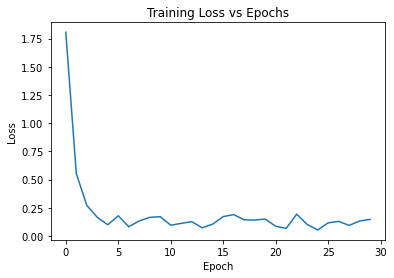

In [98]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.show()

# Inference

In [99]:
batch_size = 1
dataset = SliceDataset(train = False)
test_loader = DataLoader(dataset = dataset, batch_size = batch_size, shuffle = True, num_workers = 0)

# Next 4 lines are just to see the data for batch_size = 4 and NOT a part of pipeline

print(len(test_loader))
dataiter = iter(test_loader)
data = dataiter.next()
seq, lbl = data
print(seq.shape, lbl.shape)

4832
torch.Size([1, 50, 36]) torch.Size([1, 1])


In [100]:
# Initialize variables to store the number of correct and total predictions

lbls, preds = [], []
correct = 0
total = 0
class2, class3, class4 = 0, 0, 0
correct_class2, correct_class3, correct_class4  = 0, 0, 0

# Turn off gradients and set the model to evaluation mode
with torch.no_grad():
    model.eval()
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.reshape(-1, window*features).to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = model(inputs)
        
        # Get the predictions by finding the class with the maximum probability
        _, predicted = torch.max(outputs.data, 1)
        
#         print(predicted, labels)
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        lbls.append(labels.item())
        preds.append(predicted.item())
        
        class2 += (labels == 2).sum().item()
        class3 += (labels == 3).sum().item()
        class4 += (labels == 4).sum().item()
        
        correct_class2 += (predicted == labels and labels == 2).sum().item()
        correct_class3 += (predicted == labels and labels == 3).sum().item()
        correct_class4 += (predicted == labels and labels == 4).sum().item()
        

# Calculate the accuracy of the model
accuracy = correct / total
print('Accuracy:', accuracy)
print('Class-2 Accuracy: ', correct_class2 / class2)
print('Class-3 Accuracy: ', correct_class3 / class3)
print('Class-4 Accuracy: ', correct_class4 / class4)

Accuracy: 0.9509519867549668
Class-2 Accuracy:  0.9975349219391948
Class-3 Accuracy:  0.889199776161164
Class-4 Accuracy:  0.9803063457330415


In [205]:
from collections import Counter 
counter_labels = Counter(lbls)
counter_preds = Counter(preds)
print(counter_labels, counter_preds)

Counter({4: 1828, 3: 1787, 2: 1217}) Counter({4: 1887, 3: 1737, 2: 1208})


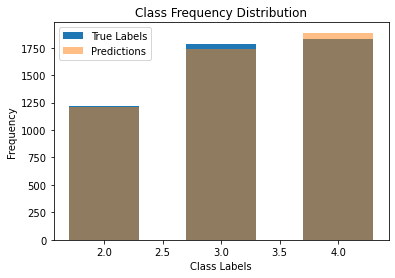

In [264]:
x1 = list(counter_labels.keys())
y1 = list(counter_labels.values())

x2 = list(counter_preds.keys())
y2 = list(counter_preds.values())

# Plot the class frequencies using a bar plot
plt.bar(x1, y1, width=0.6, alpha = 1, label = 'True Labels')
plt.bar(x2, y2, width=0.6, alpha = 0.5, label = 'Predictions')

# Add labels and title to the plot
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Frequency Distribution')
plt.legend()

# Show the plot
plt.show()


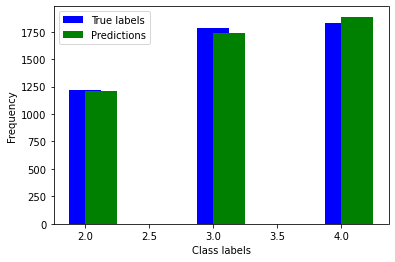

In [262]:
plt.bar(x1, y1, color='blue', width=0.25, label='True labels', alpha = 1)

# Plot second bar plot with shifted x-coordinates
plt.bar(x2, y2, color='g', width=0.25, label='Predictions',
        align='edge', alpha = 1)

# Add labels and legend
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

# Random Forest

In [320]:
from tqdm import tqdm, trange

window = 150
skip = 1
features = 36

sequences = []
labels = []

for i in trange(len(files)):
    
    motion_name = "SQT01.mot"
    motion_data = os.path.join(files[i], motion_name)
    score = df_labels.loc[df_labels['Sequence '] == files[i][23:], 'Score']


    with open(motion_data) as f:
        d = f.read().splitlines()

    nrows, ncols = int(d[2].split("=")[1]), int(d[3].split("=")[1])
    headers = d[10].split("\t")

    df = []
    for l in d[11:]:
        df.append([float(x) for x in l.split('\t')])

    df = pd.DataFrame(df, columns=headers)
    arr = df.to_numpy()
    
    start = 0
    
    while start < len(df):
        rows = [row.to_numpy() for _, row in df[start:start+window].iterrows()]
        stacked_rows = np.hstack(rows)
        if stacked_rows.shape[0] == window*features:
            sequences.append(stacked_rows)
            labels.append(int(score))
        start += skip
    



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [03:13<00:00,  5.08s/it]


In [321]:
len(labels), len(sequences)

(20357, 20357)

In [322]:
X = np.vstack(sequences)
y = np.array(labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [323]:
X.shape, y.shape

((20357, 5400), (20357,))

In [324]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

In [325]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [326]:
from collections import Counter

print(Counter(y_test), Counter(y_pred))

Counter({1: 1854, 0: 1162, 2: 1056}) Counter({1: 2240, 2: 2140, 0: 72})


In [327]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.5260314341846758


# XGBoost

In [10]:
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score

In [22]:
from tqdm import tqdm, trange

window = 150
skip = 1
features = 36

sequences = []
labels = []

for i in trange(len(files)):
    
    motion_name = "SQT01.mot"
    motion_data = os.path.join(files[i], motion_name)
    score = df_labels.loc[df_labels['Sequence '] == files[i][23:], 'Score']


    with open(motion_data) as f:
        d = f.read().splitlines()

    nrows, ncols = int(d[2].split("=")[1]), int(d[3].split("=")[1])
    headers = d[10].split("\t")

    df = []
    for l in d[11:]:
        df.append([float(x) for x in l.split('\t')])

    df = pd.DataFrame(df, columns=headers)
    arr = df.to_numpy()
    
    start = 0
    
    while start < len(df):
        rows = [row.to_numpy() for _, row in df[start:start+window].iterrows()]
        stacked_rows = np.hstack(rows)
        if stacked_rows.shape[0] == window*features:
            sequences.append(stacked_rows)
            labels.append(int(score))
        start += skip
    



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [01:58<00:00,  3.11s/it]


In [23]:
len(labels), len(sequences)

(20357, 20357)

In [24]:
X = np.vstack(sequences)
y = np.array(labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
X.shape, y.shape

((20357, 5400), (20357,))

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

In [27]:
# Convert data into XGBoost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost's hyperparameters
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 10,
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'merror',
    'seed': 0
}

In [28]:
# Train XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=10)

[10:31:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [29]:
# Predict using XGBoost model
y_pred = bst.predict(dtest)

In [30]:
# Evaluate XGBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.26%


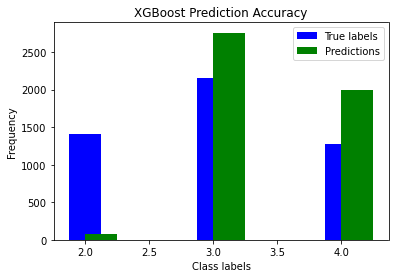

In [303]:
from collections import Counter 
import matplotlib.pyplot as plt 

counter_labels = Counter(y_test)
counter_preds = Counter(y_pred)

x1 = list(counter_labels.keys())
y1 = list(counter_labels.values())
x1 = [val+2 for val in x1]

x2 = list(counter_preds.keys())
y2 = list(counter_preds.values())
x2 = [val+2 for val in x2]

plt.bar(x1, y1, color='blue', width=0.25, label='True labels', alpha = 1)

# Plot second bar plot with shifted x-coordinates
plt.bar(x2, y2, color='g', width=0.25, label='Predictions',
        align='edge', alpha = 1)

# Add labels and legend
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.title('XGBoost Prediction Accuracy')
plt.legend()

# Show plot
plt.show()